In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import ensemble
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import GenericUnivariateSelect

In [5]:
# Linear Regression formula
data = pd.read_csv('data2020-full_Boston.txt', sep=",", header=0)
data.U_BDRMS=data.U_BDRMS.replace(np.nan, 0)
data=data.sample(n=10000)
data=data[['AV_BLDG','PTYPE','LAND_SF','GROSS_TAX','AV_TOTAL','U_BDRMS']]
X = data[['LAND_SF','PTYPE','GROSS_TAX','U_BDRMS']]
y = data['AV_TOTAL'].values.reshape(-1,1)

poly = PolynomialFeatures(2)
X=poly.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train= sc_y.fit_transform(y_train)
y_test= sc_y.fit_transform(y_test)

poly_reg_model= Pipeline([('scale', StandardScaler()),
                ('select', GenericUnivariateSelect(
                mutual_info_regression, mode='percentile', param=10)),
                ('regress', LinearRegression())])

p = dict(scale = [StandardScaler()], # alternative normalization
         select__param = [2, 5, 10,100], # number of features to retain
         regress__fit_intercept = [True, False]) # with or without an intercept

grid_poly_reg_model=GridSearchCV(poly_reg_model,p)

grid_poly_reg_model.fit(X_train,y_train.ravel())


y_pred= grid_poly_reg_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Linear Regression Test and Predicted Data")
plt.legend()
plt.show()


ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'AV_TOTAL' was supplied

In [3]:
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")

141227    355
135168    101
64921     101
46383     105
15002     102
         ... 
9156      102
159136    102
80440     105
172717    995
26555     102
Name: PTYPE, Length: 10000, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6,15,27,28,29,34,35,36,37,38,39,40,41,42,44,45,46,47,48,58,59,64,65,66,67,68,69,70,72,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    9.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:   12.9s finished


RandomForestRegressor(max_depth=1, n_estimators=7)
MSE:  0.8711740685304664
RMSE:  0.4355870342652332


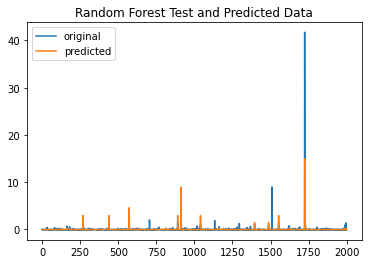

In [7]:
#Random Forest Regression
data =  pd.read_csv('data2020-full_Boston.txt', sep=",", header=0)
data.U_BDRMS=data.U_BDRMS.replace(np.nan, 0)
data=data.sample(n=10000)
data=data[['AV_BLDG','PTYPE','LAND_SF','GROSS_TAX','AV_TOTAL','U_BDRMS']]
X = data[['LAND_SF','PTYPE','GROSS_TAX','U_BDRMS']]
y = data['AV_TOTAL'].values.reshape(-1,1)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



# Set the parameters by cross-validation
tuned_parameters = {'n_estimators': [5, 7, 9], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

# clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=5, verbose=1)
clf.fit(X_train, y_train.ravel())
print (clf.best_estimator_)


sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train= sc_y.fit_transform(y_train)
y_test= sc_y.fit_transform(y_test)


regressor = RandomForestRegressor(n_estimators = 7,criterion="mse",max_depth=3, random_state = 1) 


regressor.fit(X_train, y_train.ravel())


y_pred = regressor.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))


x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Random Forest Test and Predicted Data")
plt.legend()
plt.show()

In [5]:
#Support Vector Regression
data =  pd.read_csv('data2020-full_Boston.txt', sep=",", header=0)
data.U_BDRMS=data.U_BDRMS.replace(np.nan, 0)
data=data.sample(n=10000)
data=data[['AV_BLDG','PTYPE','LAND_SF','GROSS_TAX','AV_TOTAL','U_BDRMS']]
x = data[['LAND_SF','PTYPE','GROSS_TAX','U_BDRMS']]
y = data['AV_TOTAL'].values.reshape(-1,1)


data.['PTYPE']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2,random_state=1)


svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)})
svr.fit(X_train, y_train.ravel())

print(svr.best_estimator_)
sc_X = StandardScaler()
sc_y = StandardScaler()
xtrain = sc_X.fit_transform(xtrain)
xtest = sc_X.fit_transform(xtest)
ytrain= sc_y.fit_transform(ytrain)
ytest= sc_y.fit_transform(ytest)


svr = SVR(kernel='rbf',C=100.0,gamma=.01,tol=.0001)
svr.fit(xtrain, ytrain)

ypred = svr.predict(xtest)



x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Support Vector Test and Predicted Data")
plt.legend()
plt.show()
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

SyntaxError: invalid syntax (<ipython-input-5-5c5632b13aa1>, line 10)

In [11]:
##Correlation matrix of data
data =  pd.read_csv('data2020-full_Boston.txt', sep=",", header=0)
data.corr()



,PID,CM_ID,GIS_ID,ZIPCODE,PTYPE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,...,S_UNIT_RES,S_UNIT_COM,S_UNIT_RC,U_BASE_FLOOR,U_NUM_PARK,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_FPLACE
PID,1.000000,0.999999,1.000000,0.193415,-0.064795,-0.028758,-0.049484,-0.047710,-0.041050,0.001051,...,-0.036570,-0.033297,NaN,-0.222847,0.244485,0.133455,0.145646,-0.121626,-0.039581,-0.155471
CM_ID,0.999999,1.000000,1.000000,0.250845,0.014065,-0.003289,-0.055066,-0.055077,-0.032716,-0.001825,...,-0.036570,-0.033297,NaN,-0.222850,0.244494,0.133470,0.145657,-0.121630,-0.039590,-0.155481
GIS_ID,1.000000,1.000000,1.000000,0.193414,-0.064795,-0.028758,-0.049484,-0.047710,-0.041050,0.001050,...,-0.036570,-0.033297,NaN,-0.222848,0.244480,0.133470,0.145657,-0.121620,-0.039583,-0.155472
ZIPCODE,0.193415,0.250845,0.193414,1.000000,-0.024269,0.004112,-0.001362,0.000228,-0.001643,0.001276,...,0.114578,0.010752,NaN,-0.064428,0.144768,-0.040524,-0.042447,-0.023461,0.006195,-0.065013
PTYPE,-0.064795,0.014065,-0.064795,-0.024269,1.000000,0.088535,0.046648,0.064285,0.002618,0.039559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.034938,-0.006831,-0.007614
AV_LAND,-0.028758,-0.003289,-0.028758,0.004112,0.088535,1.000000,0.591243,0.776394,0.483834,0.418504,...,NaN,NaN,NaN,-0.002705,-0.002927,0.007883,0.005615,0.011340,0.008034,0.018367
AV_BLDG,-0.049484,-0.055066,-0.049484,-0.001362,0.046648,0.591243,1.000000,0.967329,0.687789,0.074632,...,NaN,NaN,NaN,0.344270,0.183685,0.340261,0.268756,0.558174,0.350260,0.326921
AV_TOTAL,-0.047710,-0.055077,-0.047710,0.000228,0.064285,0.776394,0.967329,1.000000,0.689581,0.189881,...,NaN,NaN,NaN,0.344268,0.183683,0.340262,0.268757,0.558175,0.350261,0.326926
GROSS_TAX,-0.041050,-0.032716,-0.041050,-0.001643,0.002618,0.483834,0.687789,0.689581,1.000000,0.011845,...,NaN,NaN,NaN,0.344268,0.183683,0.340262,0.268757,0.558175,0.350260,0.326926
LAND_SF,0.001051,-0.001825,0.001050,0.001276,0.039559,0.418504,0.074632,0.189881,0.011845,1.000000,...,0.021472,0.012007,NaN,-0.011556,0.005529,0.019633,0.023473,0.027927,0.014846,0.017189
